In [1]:
import pandas as pd
import matplotlib.pyplot as plt


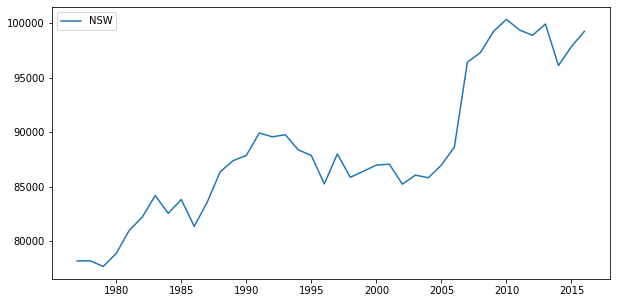

In [2]:
#A1 1
birth = pd.read_csv('Datasets/Task A/Births.csv')
birth.head()
birth[['NSW','VIC']]
plt.figure(figsize=(10,5))
plt.plot(birth.Year, birth.NSW, label='NSW')
plt.legend(loc = 'best')
plt.show()

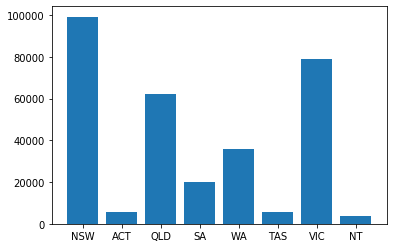

In [3]:
birth2016 = birth[birth.Year == 2016]
plt.figure()
plt.bar(birth2016.columns [1:], birth2016.iloc[0, 1:])
plt.show()



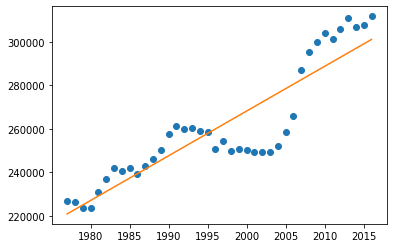

In [4]:
ausBirth = birth.loc [:,'NSW':].sum(axis=1)    #axis = 1 horizontal, axis = 0 vertical
#ausBirth

from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(birth.Year, ausBirth)
line = [slope*xi + intercept for xi in birth.Year]

plt.figure()
plt.plot(birth.Year, ausBirth, 'o', birth.Year, line)
plt.show()
         



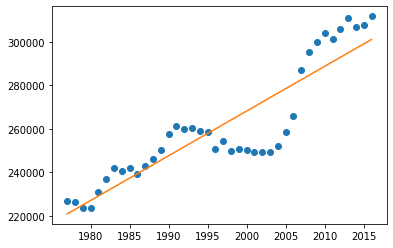

In [5]:
#Another method for question above tutor's own way

import numpy as np
coef = np.polyfit(birth.Year, ausBirth, 1)
line = np.poly1d(coef)

plt.figure()
plt.plot(birth.Year, ausBirth, 'o', birth.Year, line(birth.Year))
plt.show()



In [6]:
#A1. 2. d.

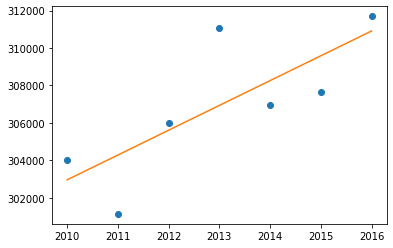

In [7]:
birth2010 = birth[birth.Year >= 2010]

coef = np.polyfit(birth2010.Year, ausBirth[-7:], 1)
line = np.poly1d(coef)
plt.figure()
plt.plot(birth2010.Year, ausBirth[-7:], 'o', birth2010.Year, line(birth2010.Year))
plt.show()

In [8]:
#A1 2 (e)

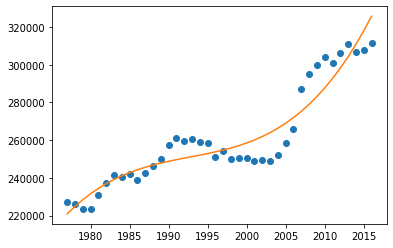

2050: 1137796    2100: 5872321


In [9]:
import numpy as np
coef = np.polyfit(birth.Year, ausBirth, 3)
line = np.poly1d(coef)

plt.figure()
plt.plot(birth.Year, ausBirth, 'o', birth.Year, line(birth.Year))
plt.show()

birth2050 = int(line(2050))
birth2100 = int(line(2100))
print('2050:',birth2050,'   2100:', birth2100)
#birth2050 = int(slope*2050 + intercept)
# birth2050 = slope*2050 + intercept #prediction of year 2050

In [10]:
#A1 3. a.

In [11]:
tfr = pd.read_csv('Datasets/Task A/TFR.csv')
tfr.head()

tfr.QLD.min()
tfr.Year[tfr.QLD.idxmin()] #min data in which index? and use the index as input to find year
print("the min val of tfr in QLD is", tfr.QLD.min(), 'it happened in', tfr.Year[tfr.QLD.idxmin()])
############ second question
#print('NT is', tfr.NT[tfr.Year[tfr.QLD.idxmin()]]) ###Requires debug

the min val of tfr in QLD is 1.8 it happened in 1999


### Question A1. 4

   Year    NSW    VIC    QLD    SA    WA   TAS   NT  ACT
0  1977  42075  30067  16991  9715  7914  3227  715  786
1  1978  40121  29343  16353  9768  7781  3299  612  782
2  1979  39975  29523  16627  9748  7779  3318  586  759
3  1980  39799  28925  15774  9536  8078  3199  588  755
4  1981  39979  29144  17195  9806  8345  3494  671  795


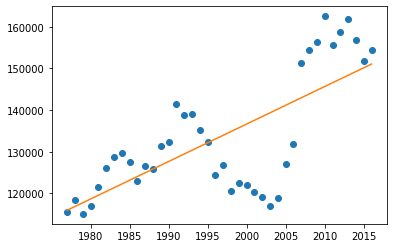

In [12]:
death = pd.read_csv('Datasets/Task A/Deaths.csv')
print(death.head()) 
#natural grouwth = birth - death rate

ausDeath = death.iloc[:, 1:].sum(axis =1)
ausNG = ausBirth - ausDeath

coef = np.polyfit(death.Year, ausNG, 1)
line = np.poly1d(coef)

plt.figure()
plt.plot(death.Year, ausNG, 'o', death.Year, line(death.Year)) #O means the solid points/dots
plt.show()

### Question A2

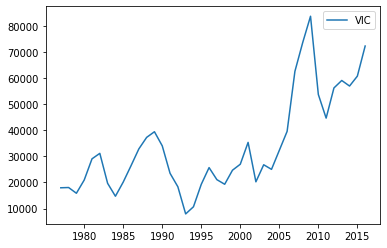

In [13]:
#1 a.
nom = pd.read_csv('Datasets/Task A/NOM.csv')
nim = pd.read_csv('Datasets/Task A/NIM.csv')

plt.figure()
plt.plot(nom.Year, nom.VIC, label = 'VIC')
plt.legend() 
plt.show()


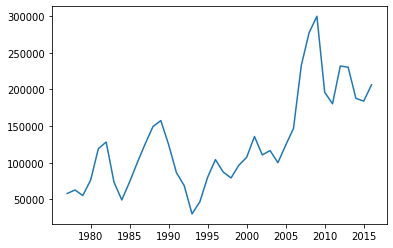

In [14]:
#1 b.
ausNom = nom.iloc[:, 1:].sum(axis =1)
plt.figure()
plt.plot(nom.Year, ausNom)
plt.show()

#Research on policy on 2008 abnormal migration activity

In [15]:
#2 a.
#Combine nom and nim into a table

meltedNom = nom.melt(id_vars ='Year', var_name ='States', value_name='NOM')
#print(meltedNom.head(100))
meltedNim = nim.melt(id_vars ='Year', var_name ='States', value_name='NIM')
combined = meltedNom.merge(meltedNim, on = ['Year', 'States'])
#print(combined.head(10))

print(combined.Year.max(),combined.Year.min() )

2016 1977


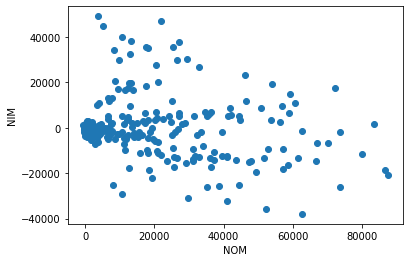

In [16]:
#2 b. 

plt.figure()
plt.scatter(combined.NOM, combined.NIM)
plt.xlabel('NOM')
plt.ylabel('NIM')
plt.show()

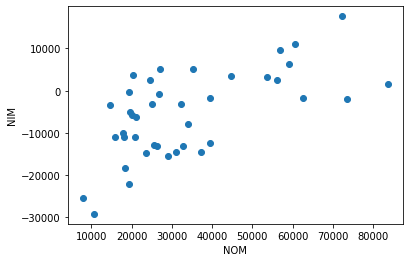

In [17]:
#2 c. 
combined1 = combined[combined.States =='VIC']


plt.figure()
plt.scatter(combined1.NOM, combined1.NIM)
plt.xlabel('NOM')
plt.ylabel('NIM')
plt.show()

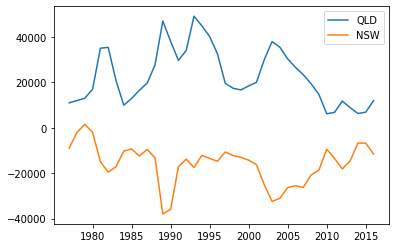

In [18]:
#Q2 d.
plt.figure()
plt.plot(nim.Year, nim.QLD, label = 'QLD')
plt.plot(nim.Year, nim.NSW, label = 'NSW')
plt.legend()
plt.show()

### Question A3

In [19]:
meltedNom = nom.melt(id_vars ='Year', var_name ='States', value_name='NOM')
meltedNim = nim.melt(id_vars ='Year', var_name ='States', value_name='NIM')
meltedBirth = birth.melt(id_vars ='Year', var_name ='States', value_name='Birth')
meltedDeath = death.melt(id_vars ='Year', var_name ='States', value_name='Death')
meltedTfr = tfr.melt(id_vars ='Year', var_name ='States', value_name='Tfr')

combined = meltedNom.merge(meltedNim, on =['Year', 'States'])
combined = combined.merge(meltedBirth, on=['Year', 'States'])
combined = combined.merge(meltedDeath, on=['Year', 'States'])
combined = combined.merge(meltedTfr, on=['Year', 'States'])

totalGrowth = combined.Birth - combined.Death + combined.NOM + combined.NIM
combined['TotalGrowth'] = totalGrowth
print(combined.head())



   Year States    NOM    NIM  Birth  Death    Tfr  TotalGrowth
0  1977    NSW  25236  -9000  78173  42075  1.995        52334
1  1978    NSW  25825  -2000  78190  40121  1.953        61894
2  1979    NSW  28086   1500  77669  39975  1.902        67280
3  1980    NSW  33499  -2000  78859  39799  1.925        70559
4  1981    NSW  47291 -14963  80980  39979  1.942        73329


### Question A3. 1

In [20]:
from motionchart.motionchart import MotionChart

mchart = MotionChart(df = combined, key='Year', x='NOM', y='NIM', size='TotalGrowth', category='States')
mchart.to_notebook()

### A3 2.

In [21]:
nom.Year[nom.VIC > nom.NSW]



29    2006
Name: Year, dtype: int64

In [22]:
combined.States[combined.NIM.idxmax()]

'QLD'

### Task B

In [23]:
#B1 1.
crime =pd.read_csv('Datasets/Task B/Crime_Statistics_SA_2014_2019.csv')
#print(crime.head())
a = crime.groupby(['Suburb - Incident', 'Reported Date'])['Offence Count'].sum()
b = a[ a>= 15]
c = b.groupby('Suburb - Incident').count()
print(c)

Suburb - Incident
ADELAIDE           877
ASCOT PARK           1
DAVOREN PARK         1
FINDON               1
GLENELG              1
LOXTON               1
MARLESTON            1
MODBURY              1
MORPHETT VALE        3
MOUNT BARKER         1
MOUNT GAMBIER        3
MURRAY BRIDGE        5
NOT DISCLOSED        5
NURIOOTPA            1
OAKLANDS PARK        3
PORT AUGUSTA         4
PORT LINCOLN         5
PROSPECT             2
SALISBURY NORTH      1
SEAFORD MEADOWS      1
ST GEORGES           1
Name: Offence Count, dtype: int64


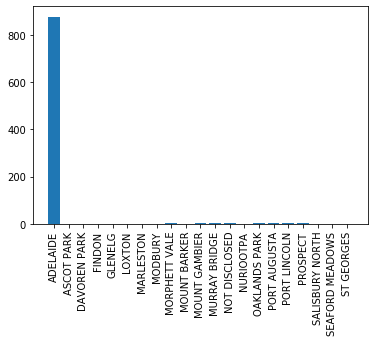

In [24]:
#B1 2.
plt.figure()
plt.bar(c.index, c)
plt.xticks(rotation = 90)
plt.show()

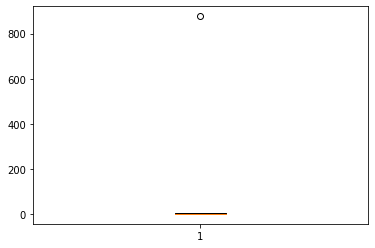

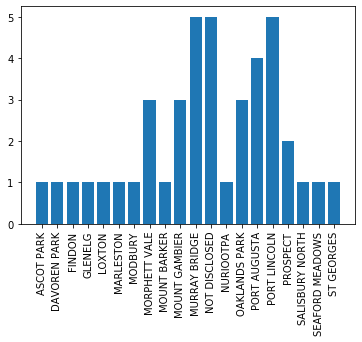

In [25]:
#B1 3. 

plt.figure()
plt.boxplot(c)
plt.show()

#remove outlier 
c.drop(index = 'ADELAIDE', inplace = True)

plt.figure()
plt.bar(c.index, c)
plt.xticks(rotation = 90)
plt.show()

#B2 
Three areas that night contain errors:
1. reported date might have error
2. postcode might not be following the correct format
3. Offence count (outliers eg: 1000 crime count per day (which is a rediculous number))

In [26]:
pd.to_datetime(crime['Reported Date']) #check whether date contains error
#If successful converted, no error here

0        2014-01-01
1        2014-01-01
2        2014-01-01
3        2014-01-01
4        2014-01-01
5        2014-01-01
6        2014-01-01
7        2014-01-01
8        2014-01-01
9        2014-01-01
10       2014-01-01
11       2014-01-01
12       2014-01-01
13       2014-01-01
14       2014-01-01
15       2014-01-01
16       2014-01-01
17       2014-01-01
18       2014-01-01
19       2014-01-01
20       2014-01-01
21       2014-01-01
22       2014-01-01
23       2014-01-01
24       2014-01-01
25       2014-01-01
26       2014-01-01
27       2014-01-01
28       2014-01-01
29       2014-01-01
            ...    
385266   2019-03-31
385267   2019-03-31
385268   2019-03-31
385269   2019-03-31
385270   2019-03-31
385271   2019-03-31
385272   2019-03-31
385273   2019-03-31
385274   2019-03-31
385275   2019-03-31
385276   2019-03-31
385277   2019-03-31
385278   2019-03-31
385279   2019-03-31
385280   2019-03-31
385281   2019-03-31
385282   2019-03-31
385283   2019-03-31
385284   2019-03-31


In [27]:
crime['Postcode - Incident'].value_counts() #checks postcode error
#postcode not starting with 5 => not adelaide postcode
#With decimals

5108             11390
5112             10288
5000              9793
5113              7944
5114              7597
NOT DISCLOSED     6458
5162              5283
5700              5141
5608              4904
5043              4551
5253              4532
5290              4429
5095              4305
5085              4139
5084              3965
5023              3956
5013              3776
5008              3723
5118              3708
5107              3707
5086              3631
5092              3569
5046              3567
5109              3526
5163              3468
5606              3420
5011              3378
5045              3313
5014              3273
5168              3237
                 ...  
6330.0               1
5661.0               1
5297                 1
5263.0               1
1011.0               1
5730.0               1
7109.0               1
5660.0               1
5572.0               1
5642.0               1
3001.0               1
5630.0               1
3037       

In [28]:
#Inspect postcode problem
a = crime.groupby(['Postcode - Incident', 'Reported Date'])['Offence Count'].sum()
b = a[ a>= 15]
c = b.groupby('Postcode - Incident').count()
print(c)

Postcode - Incident
5000             723
5000.0           153
5007.0             1
5015               1
5023               1
5033.0             1
5043.0             1
5045               2
5045.0             1
5046               4
5046.0             1
5061               1
5064.0             1
5082               1
5082.0             1
5085               1
5086               1
5086.0             1
5092               1
5095               1
5108             235
5108.0            33
5112             143
5112.0            30
5113              38
5113.0             5
5114              25
5114.0             2
5158               1
5162               6
5162.0             3
5163               1
5163.0             1
5169               2
5251               1
5253               7
5253.0             2
5290               3
5333               1
5355               1
5540               1
5606               3
5606.0             2
5608               9
5608.0             2
5700               8
5700.0        

Postcode - Incident
0         6
5000    876
5007      1
5015      1
5023      1
5033      1
5043      1
5045      3
5046      5
5061      1
5064      1
5082      2
5085      1
5086      2
5092      1
5095      1
5108    268
5112    173
5113     43
5114     27
5158      1
5162      9
5163      2
5169      2
5251      1
5253      9
5290      3
5333      1
5355      1
5540      1
5606      5
5608     11
5700     10
Name: Offence Count, dtype: int64


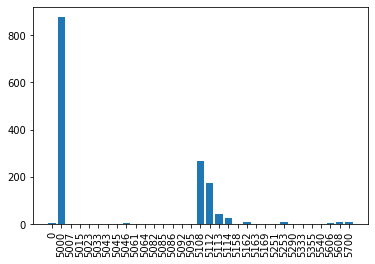

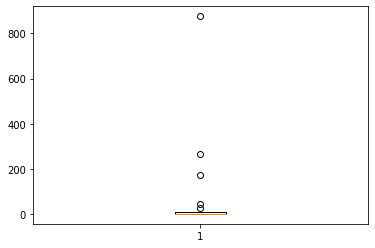

In [31]:
#How to fix the problem?

a = crime.groupby(['Postcode - Incident', 'Reported Date'])['Offence Count'].sum()
b = a[ a>= 15]
c = b.groupby('Postcode - Incident').count()
print(c)

plt.figure()
plt.bar(c.index.astype('str'), c)
plt.xticks(rotation = 90)
plt.show()

#boxplot
plt.figure()
plt.boxplot(c)
plt.show()